In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def EDA(df, show_plots=True):
    # Estadísticas por columna numérica
    columnas_num = df.select_dtypes(include=[np.number]).columns
    if len(columnas_num) == 0:
        print("\n No se encontraron columnas numéricas.")
    else:
        for col in columnas_num:
            serie = df[col].dropna()
            modos = serie.mode()
            modos_list = modos.tolist() if not modos.empty else []
            print(f"\n🔎 Estadísticas para la columna: {col}")
            print(f"  ▸ Media: {serie.mean():.4f}" if not serie.empty else "  ▸ Media: n/a")
            print(f"  ▸ Mediana: {serie.median():.4f}" if not serie.empty else "  ▸ Mediana: n/a")
            print(f"  ▸ Desviación estándar: {serie.std():.4f}" if not serie.empty else "  ▸ Desv. estándar: n/a")
            print(f"  ▸ Mínimo: {serie.min() if not serie.empty else 'n/a'}")
            print(f"  ▸ Máximo: {serie.max() if not serie.empty else 'n/a'}")
            print(f"  ▸ Moda(s): {modos_list if modos_list else 'n/a'}")

    # Visualizaciones
    if show_plots and len(columnas_num) > 0:
        # Boxplots
        for col in columnas_num:
            plt.figure()
            df.boxplot(column=col)
            plt.title(f"Boxplot de {col}")
            plt.tight_layout()
            plt.show()

        # Histogramas
        plt.figure()
        df[columnas_num].hist(figsize=(20, 15))
        plt.tight_layout()
        plt.show()

        # Matriz de correlación
        correlaciones = df.corr(numeric_only=True)
        if correlaciones.shape[0] >= 2:
            plt.figure(figsize=(14, 10))
            annot_flag = correlaciones.shape[0] <= 12
            sns.heatmap(correlaciones, cmap="coolwarm", annot=annot_flag, fmt=".2f",
                        linewidths=0.5)
            plt.title(" Matriz de correlación entre variables numéricas")
            plt.xticks(rotation=45, ha="right")
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
        else:
            print("\n No se puede calcular una matriz de correlación útil (muy pocas columnas numéricas).")

    



🔎 Estadísticas para la columna: apartment_id
  ▸ Media: 15119780.9941
  ▸ Mediana: 16737061.0000
  ▸ Desviación estándar: 7715577.7476
  ▸ Mínimo: 11964
  ▸ Máximo: 27245117
  ▸ Moda(s): [10005342, 10713417, 13966456, 14326808, 14582385, 15402794, 24038577]

🔎 Estadísticas para la columna: host_id
  ▸ Media: 62186729.4978
  ▸ Mediana: 42613804.0000
  ▸ Desviación estándar: 57470944.5630
  ▸ Mínimo: 10704
  ▸ Máximo: 336524176
  ▸ Moda(s): [80839530]

🔎 Estadísticas para la columna: accommodates
  ▸ Media: 4.3518
  ▸ Mediana: 4.0000
  ▸ Desviación estándar: 2.6206
  ▸ Mínimo: 1
  ▸ Máximo: 29
  ▸ Moda(s): [2]

🔎 Estadísticas para la columna: bathrooms
  ▸ Media: 1.6071
  ▸ Mediana: 1.0000
  ▸ Desviación estándar: 0.9896
  ▸ Mínimo: 0.0
  ▸ Máximo: 12.0
  ▸ Moda(s): [1.0]

🔎 Estadísticas para la columna: bedrooms
  ▸ Media: 1.9682
  ▸ Mediana: 2.0000
  ▸ Desviación estándar: 1.3002
  ▸ Mínimo: 0.0
  ▸ Máximo: 16.0
  ▸ Moda(s): [1.0]

🔎 Estadísticas para la columna: beds
  ▸ Media: 3.013

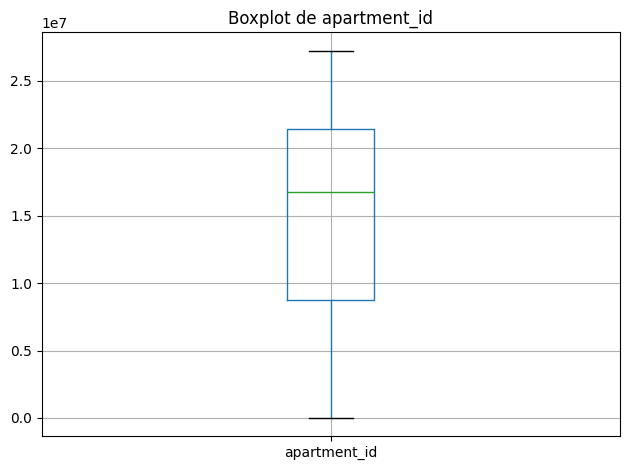

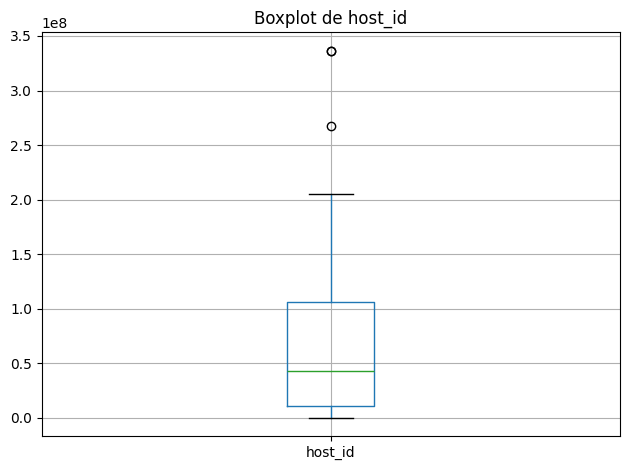

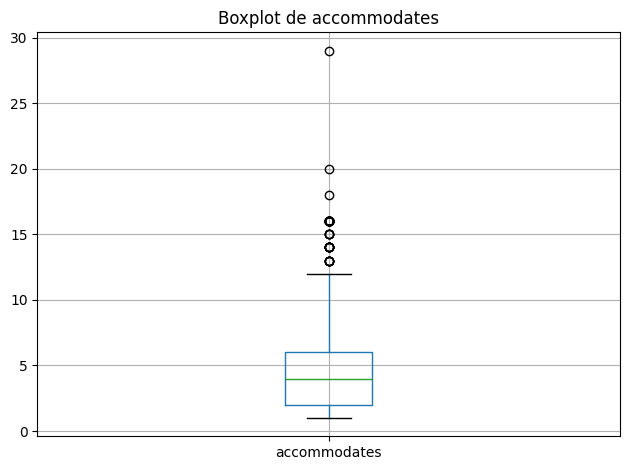

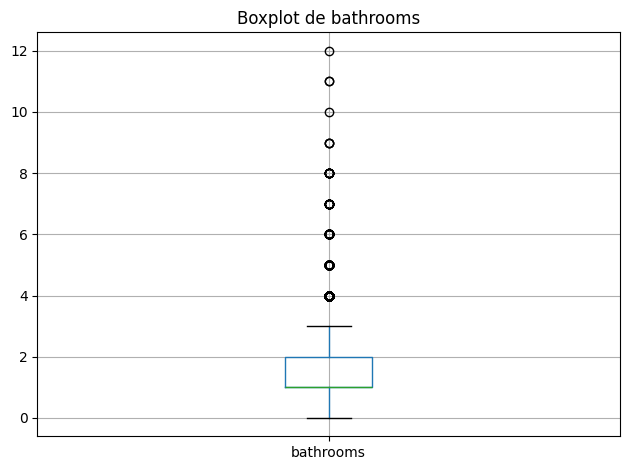

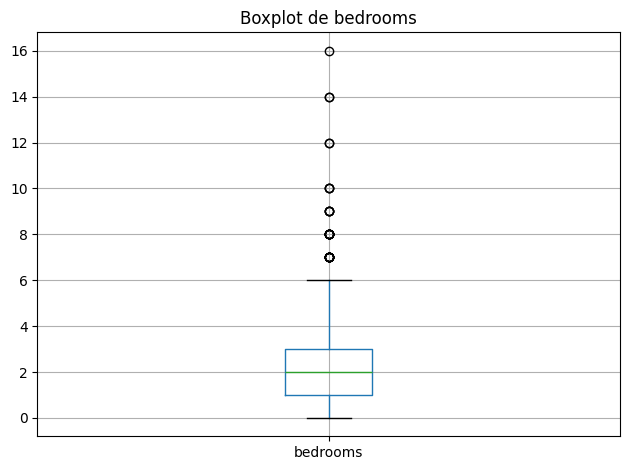

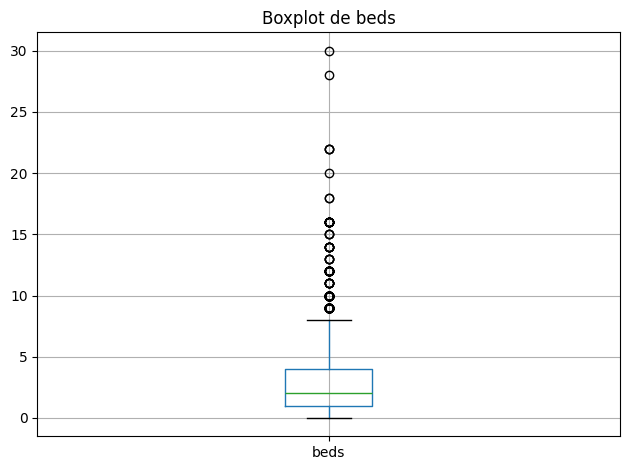

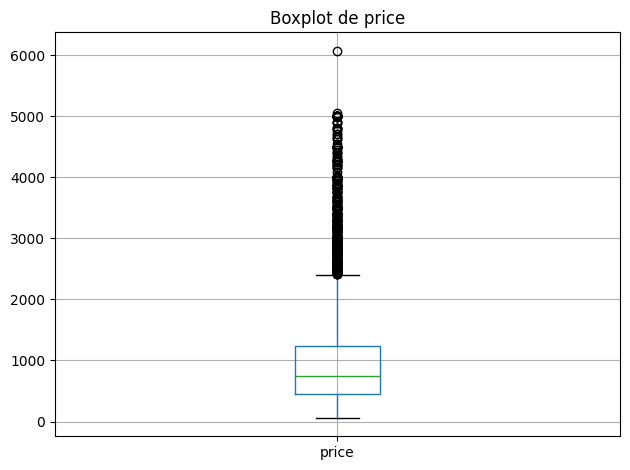

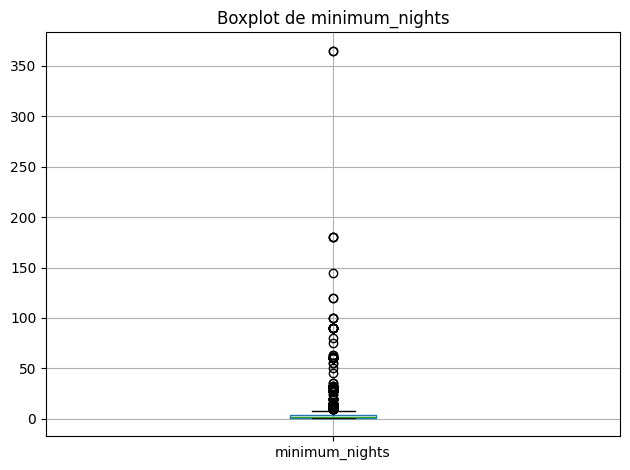

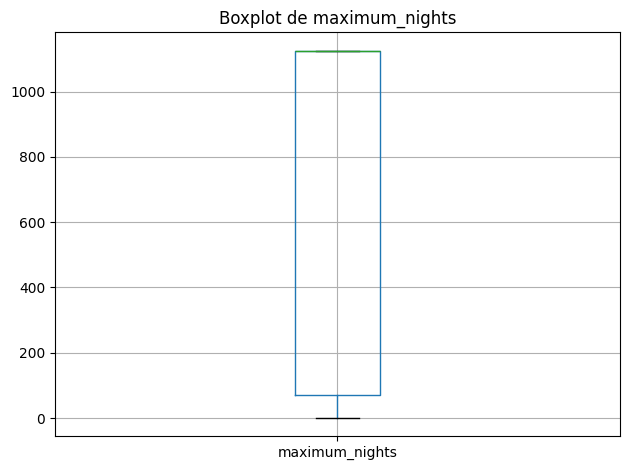

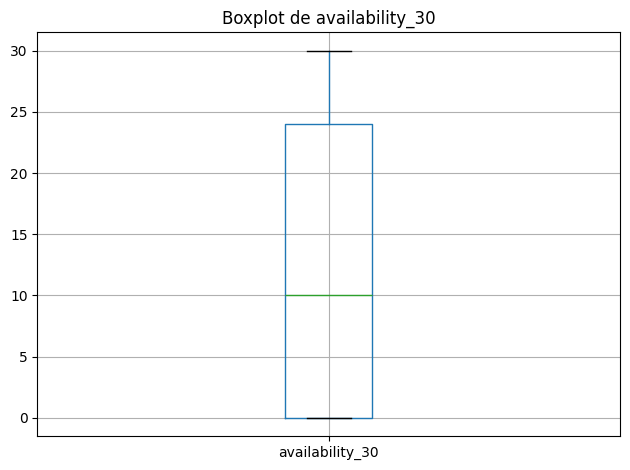

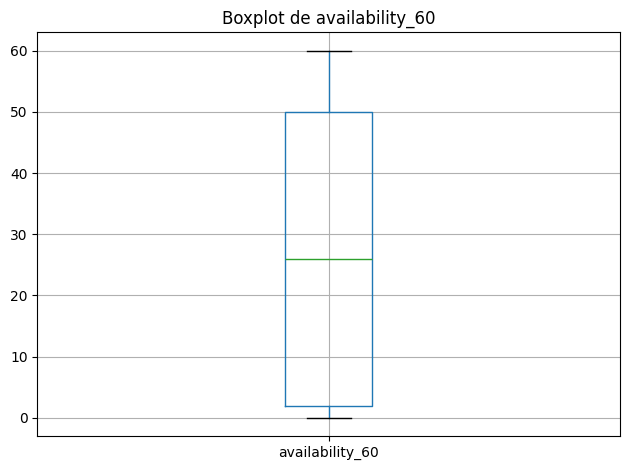

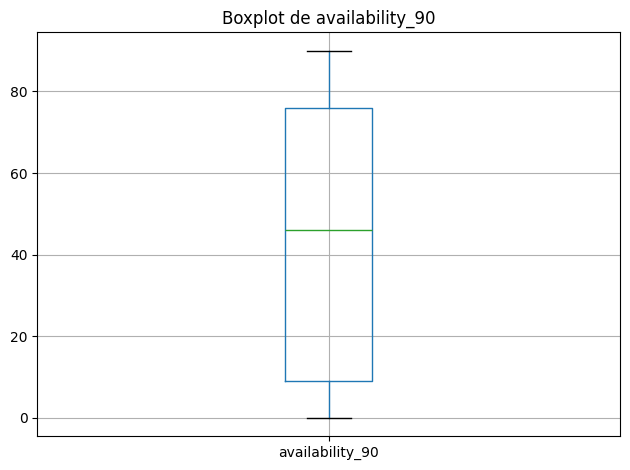

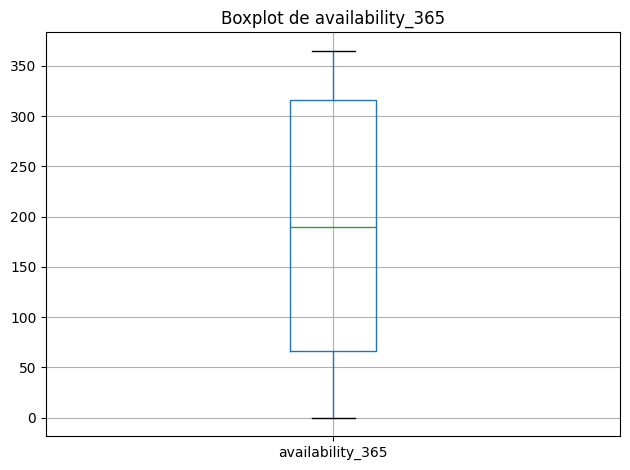

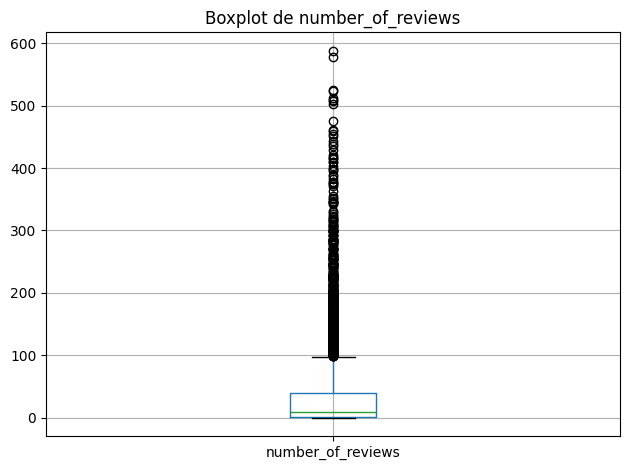

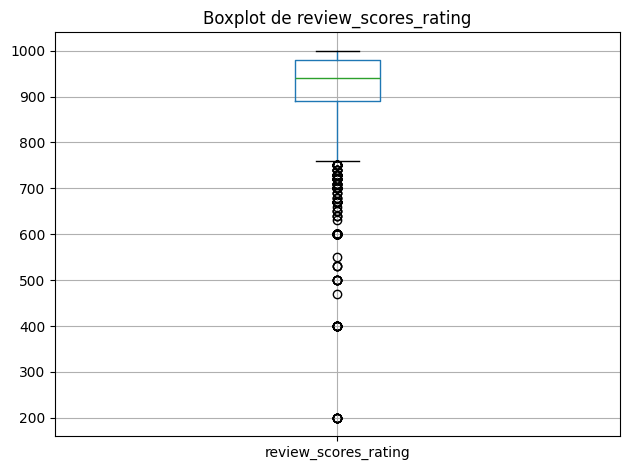

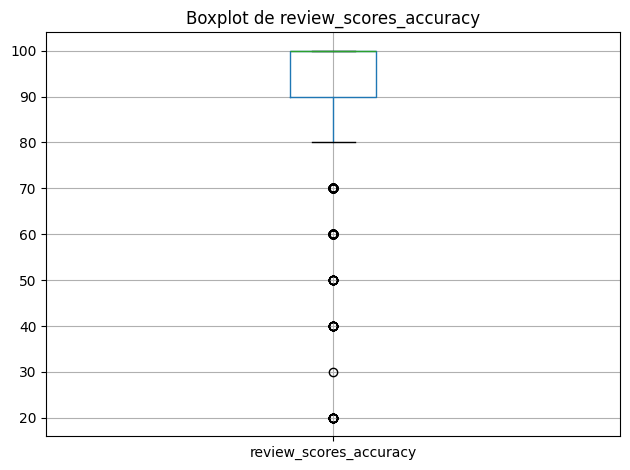

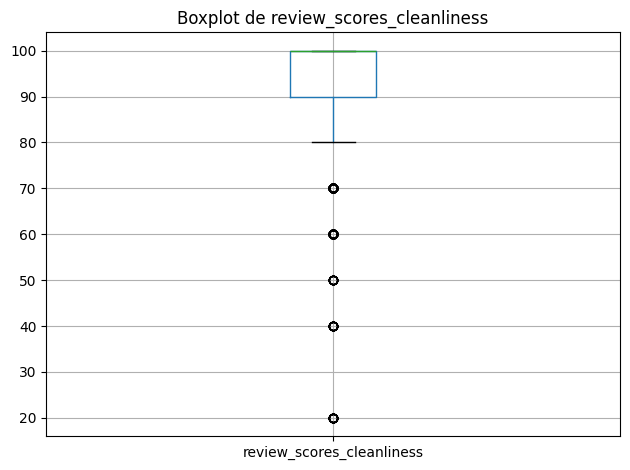

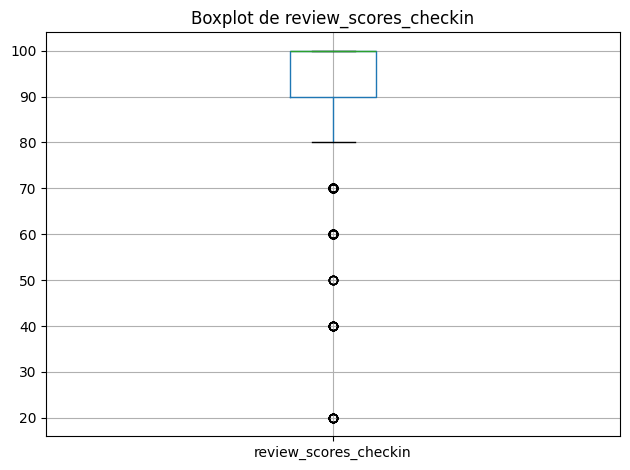

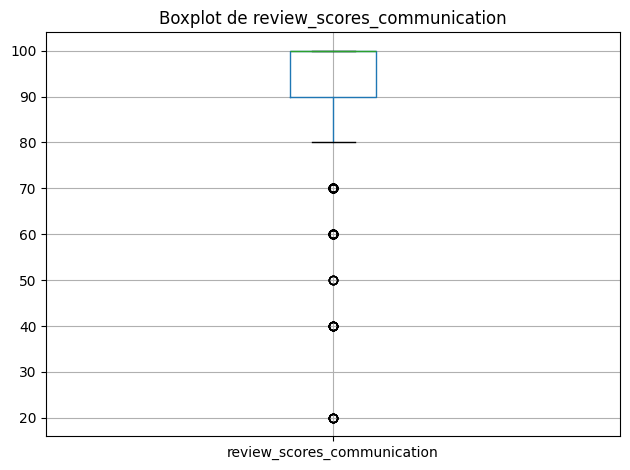

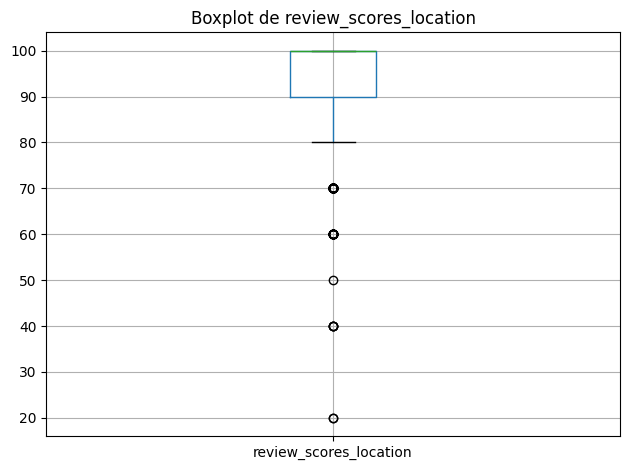

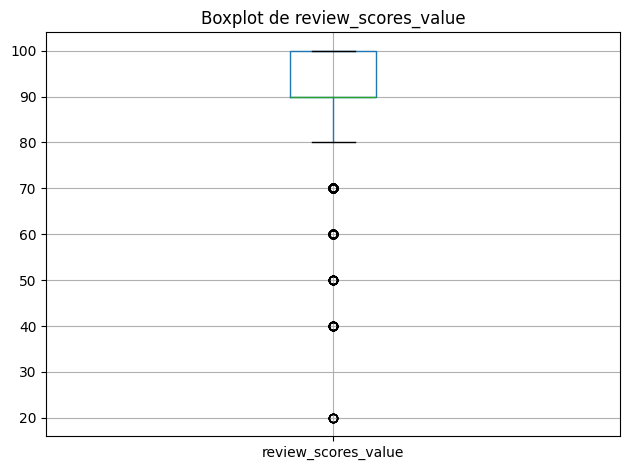

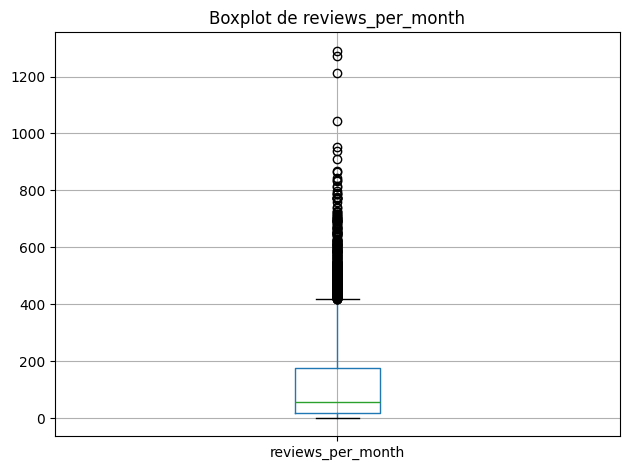

<Figure size 640x480 with 0 Axes>

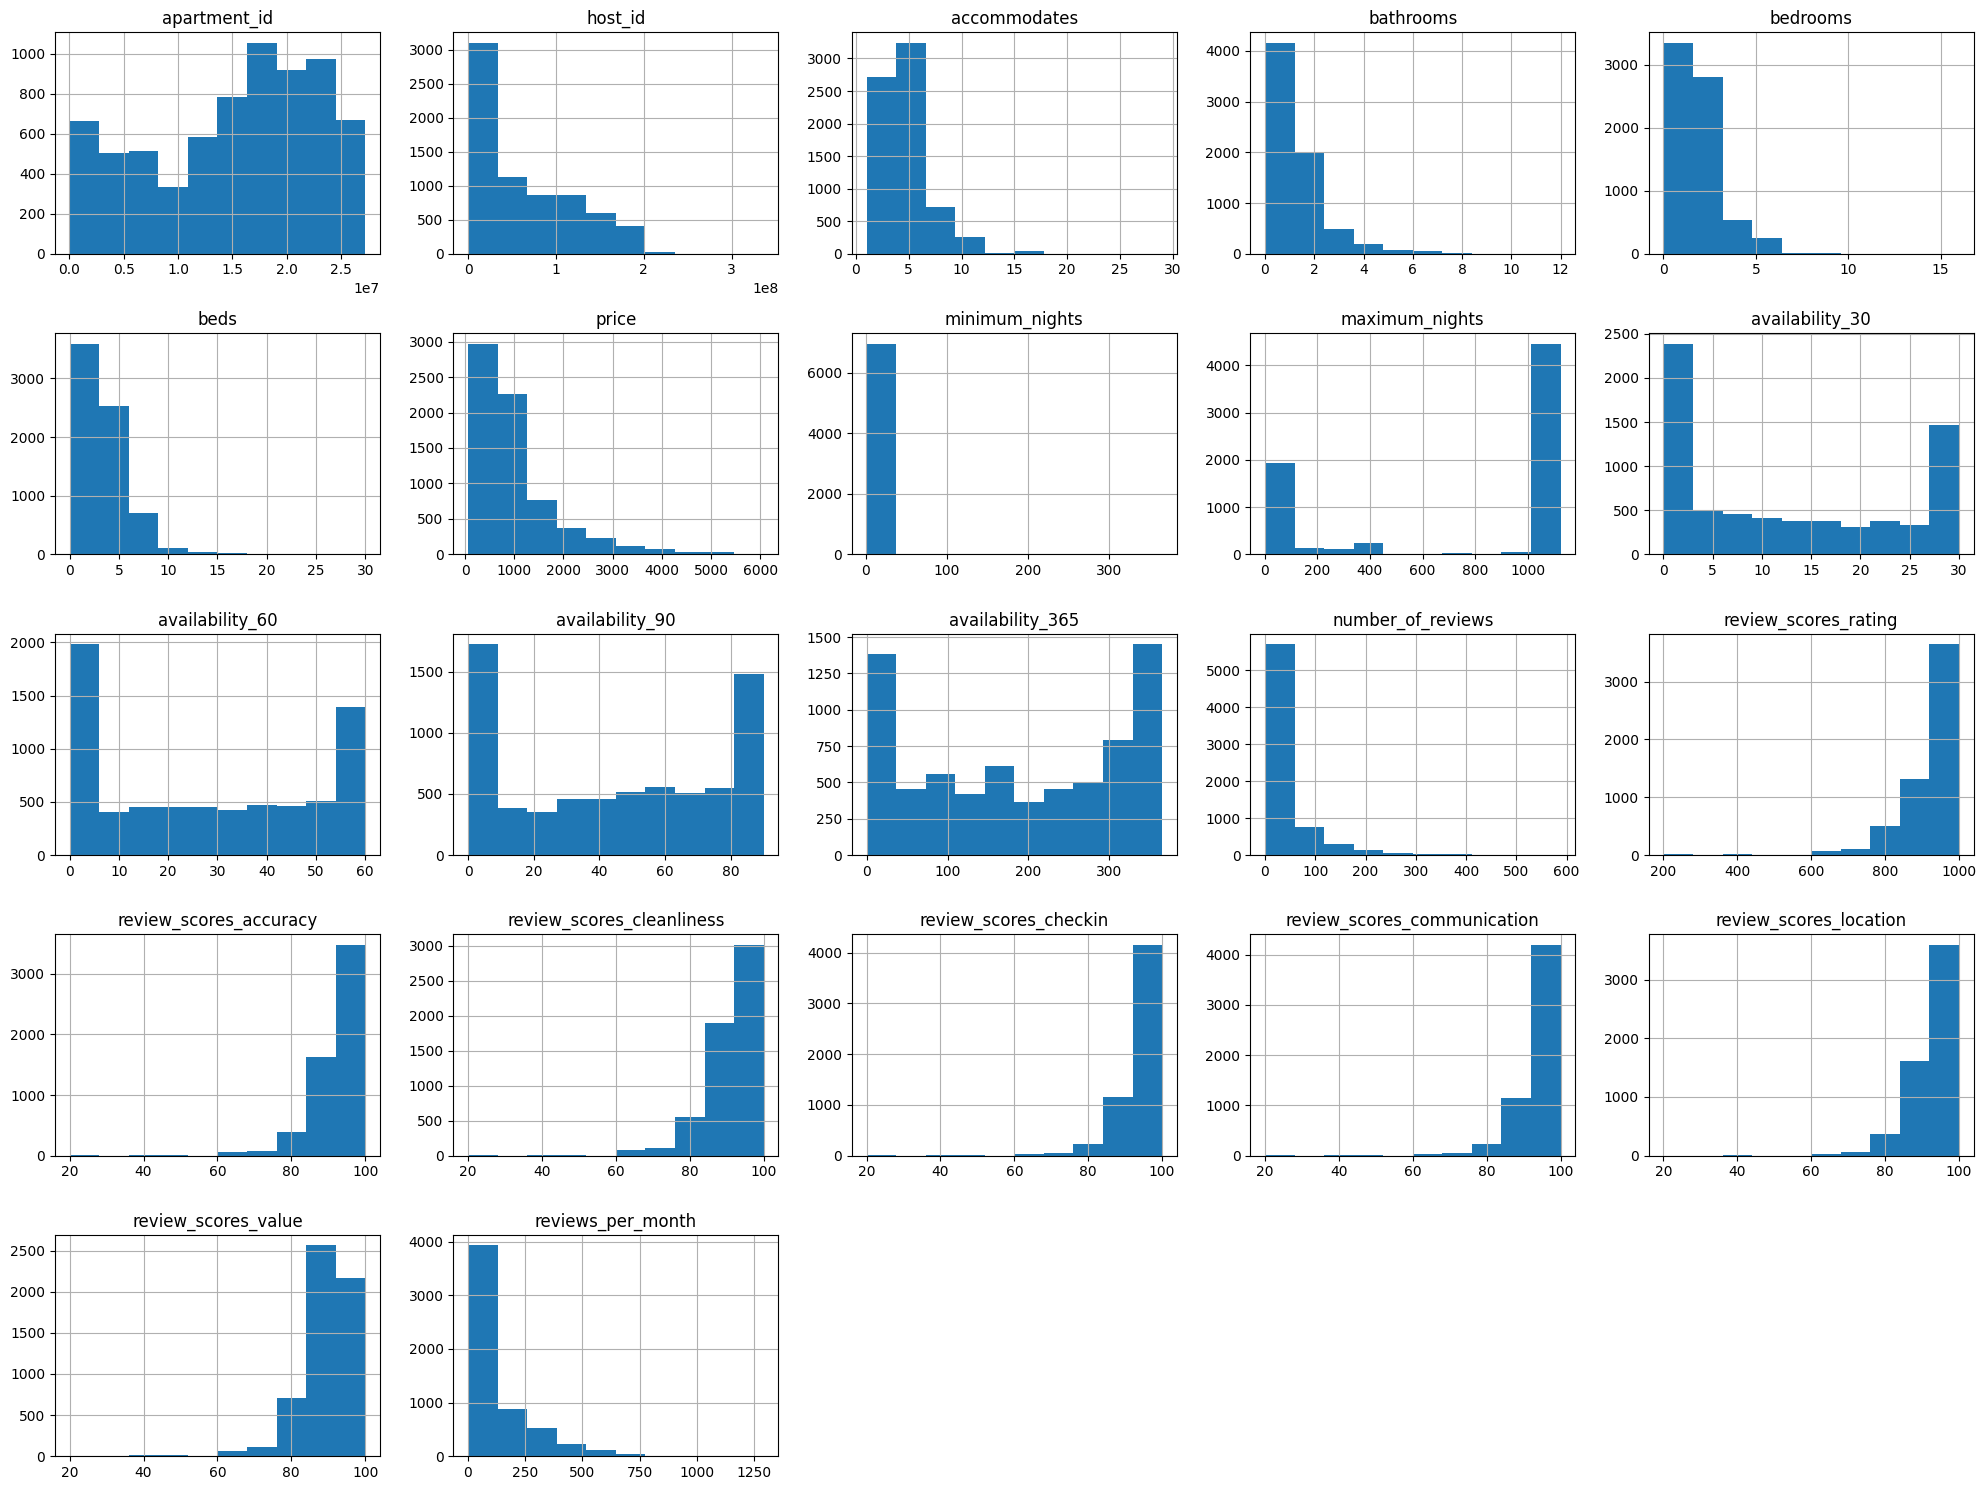

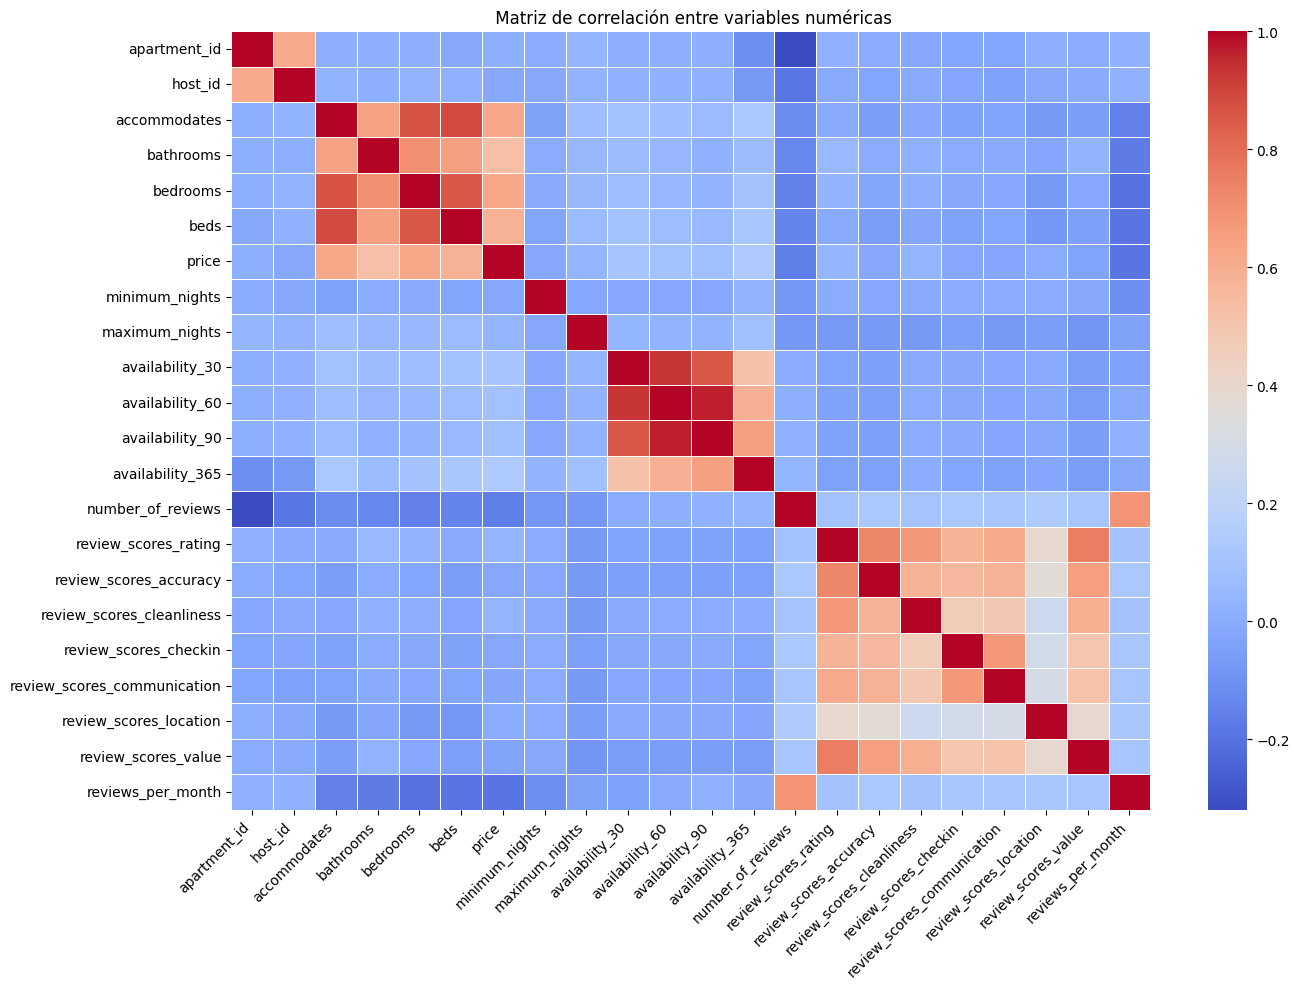

In [8]:
df = pd.read_csv("data/staySpain_raw.csv")
EDA(df)


Informe EDA
1. Información General

Registros totales: 7.001 alojamientos.
Capacidad: Entre 1 y 29 plazas, y entre 0 y 30 camas.
Precio: Promedio de 1.011 €, con un rango de 60 € a 6.071 €. Alta dispersión y presencia de outliers.
Los datos muestran gran diversidad en capacidad y precio. Algunos alojamientos presentan precios extremadamente bajos o camas nulas, lo que podría requerir validación o limpieza.

2. Disponibilidad

Disponibilidad limitada en la mayoría de los casos:
Mediana de 10 días para disponibilidad a 30 días.
Solo 188 días promedio de disponibilidad anual (sobre 365).
Sin embargo, existen también muchos alojamientos con alta disponibilidad (100%).
Hay dos perfiles claros: alojamientos con disponibilidad casi total todo el año y otros con disponibilidad mínima. Este dato es clave para segmentar.

3. Estancia Mínima y Máxima

Noches mínimas requeridas: Entre 1 y 365.
Mediana: 2 noches.
La mayoría de alojamientos exigen estancias cortas, aunque existen outliers (probablemente errores o casos especiales).

4. Reseñas y Puntuaciones

Puntuación media general: 91.46 sobre 100.
Puntuaciones específicas muy altas:
Comunicación: 96.43
Check-in: 96.29
Ubicación: 95.31
Media de reseñas por alojamiento: 34
Reseñas por mes: Promedio de 123, con gran variabilidad.
Alta satisfacción del cliente en general. Las puntuaciones están fuertemente concentradas en rangos altos (80–100), lo que sugiere una experiencia muy positiva percibida.

5. Distribuciones y Outliers

Sesgos positivos en muchas variables (distribución sesgada a la derecha): price, minimum_nights, reviews_per_month, etc.
Múltiples outliers identificados en casi todas las variables numéricas.
Variables como apartment_id y host_id distorsionan los gráficos y no aportan valor analítico → recomendado excluirlas.
Normalizar o transformar variables altamente sesgadas. Aplicar tratamiento de outliers si se desea un análisis más robusto.

6. Matriz de Correlación – Relaciones destacadas

Correlaciones fuertes (positivas):

accommodates ↔ beds: 0.88: Plazas y camas están fuertemente relacionadas.
availability_30 ↔ 60 ↔ 90: entre 0.93 y 0.96 → Las disponibilidades en diferentes ventanas temporales son coherentes.
review_scores_* variables: todas correlacionan entre 0.67 y 0.76, Las buenas puntuaciones tienden a venir juntas.
number_of_reviews ↔ reviews_per_month: 0.69

Correlaciones débiles o irrelevantes:

minimum_nights no se correlaciona con otras variables.
price tiene una relación moderada con accommodates (0.62) y beds (0.58).
apartment_id, host_id no aportan valor predictivo.

7. Conclusiones 

Alta calidad percibida: Las puntuaciones son muy buenas y coherentes entre sí, se podrían resumir en un solo índice de satisfacción.
Disponibilidad dual: Segmentar entre alojamientos siempre disponibles vs. de disponibilidad limitada puede ser útil para análisis o predicción.
Precios y estancias muy variables: Requiere revisión y posible tratamiento de outliers y normalización para análisis más robusto.
Variables no informativas: Eliminar apartment_id y host_id para evitar distorsiones en gráficos y modelos.
Correlaciones claras: Algunas variables muestran alta redundancia (por ejemplo, puntuaciones o disponibilidades) posibles candidatos para reducción de dimensiones.